In [1]:
PAIS='Total'

ARIMA y ARIMA Estacional

Medias móviles integradas autorregresivas
El proceso general para los modelos ARIMA es el siguiente:

Visualice los datos de la serie temporal
Hacer que los datos de la serie temporal sean estacionarios
Trazar los gráficos de correlación y autocorrelación
Construya el modelo ARIMA o ARIMA estacional basado en los datos
Usar el modelo para hacer predicciones

Llama a las Librerias

ARIMA Procesos Autoregresivos, Invertible y de media móvil. 
El proceso general para los modelos ARIMA es el siguiente:

Visualice los datos de la serie temporal
Hacer que los datos de la serie temporal sean estacionarios
Trazar los gráficos de correlación y autocorrelación
Construya el modelo ARIMA o ARIMA estacional basado en los datos
Usar el modelo para hacer predicciones


Este primer módulo se encarga de llamar librerias y les coloco otro nombre. 

In [2]:
#***********************************************************************************************************************************************
#Programa: Modelo_ARIMA_Argentina_ADS.ipynb                                                                                                    *
#Lenguaje: Python en ambiente Google Colab                                                                                                     *
#Utilidad: Uso de la Metodología Box-Jenkins ARIMA para modelar y estimar Series de tiempo de las defunciones de Paises de América del Sur     *
#Realizado por: Instituto Salud Global de la Universidad Argentina John F. Kennedy.                                                            *
#Programadores: Ernesto Freiberg y Alvin Correa                                                                                                  *
#Observaciones:                                                                                                                                *
#***********************************************************************************************************************************************
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

%matplotlib inline

In [3]:
paises = pd.read_excel('https://github.com/saludglobaluk/colorectal_cancel_mortality_south_america/blob/main/data/Index.xlsx?raw=true')
print('Paises disponibles:')
paises.PAIS

Paises disponibles:


0     Argentina
1       Bolivia
2        Brasil
3         Chile
4      Colombia
5       Ecuador
6      Paraguay
7          Peru
8         Total
9       Uruguay
10    Venezuela
Name: PAIS, dtype: object

Llama el archivo Excel. 

In [4]:
def import_excel(pais):
  of = pd.read_excel(paises.loc[paises['PAIS'] == pais, 'DATOS'].values[0])
  of.columns = ['year','deaths']
  of[['year', 'deaths']] = of[['year', 'deaths']].astype(int)
  return of.set_index("year")
  
#Realiza el Contraste de hipótesis de Dickey-Fuller
#Ho: La Serie no es estacionaria
#H1: La Serie es estacionaria
def adfuller_test(deaths):
  result = adfuller(deaths)
  
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  
  for value,label in zip(result, labels):
      print(label+' : '+str(value) )

  if result[1] <= 0.05:
      print("Existe fuerte evidencia en contra de la hipótesis nula (Ho). Se rechaza la hipótesis nula. Los datos no tienen raíz unitaria y son estacionarios")
  else:
      print("Existe evidencia débil contra la hipótesis nula, la serie de tiempo tiene una raíz unitaria, lo que indica que no es estacionaria ")

#Realiza el Contraste de hipótesis de Jarque-Bera
#Ho: La Serie no es estacionaria
#H1: La Serie es estacionaria
def jarquebera_test(deaths):
  result = stats.jarque_bera(deaths)

  labels = ['JB Test Statistic','p-value','#Lags Used','Number of Observations Used']

  for value,label in zip(result, labels):
    print(label+' : '+str(value) )

  if result[1] <= 0.05:
      print("Existe fuerte evidencia en contra de la hipótesis nula (Ho). Se rechaza la hipótesis nula. Los datos no son estacionarios en promedio")
  else:
      print("Existe evidencia débil contra la hipótesis nula, lo que indica que no es estacionaria en promedio")


In [ ]:
of = import_excel(PAIS)
of.head()

,deaths
year,
1990,17518
1991,17939
1992,18732
1993,19644
1994,20339


In [ ]:
#Resumen descriptivo de la serie de tiempo.
df = of.copy()
df.describe()

,deaths
count,30.000000
mean,32335.966667
std,10222.733009
min,17518.000000
25%,23549.500000
50%,31540.500000
75%,40269.000000
max,51135.000000


En el siguiente modulo se agrega un grafico de linea el cual se construye en cuanto la cantidas de defunciones con respect del tiempo. 

<AxesSubplot:xlabel='year'>

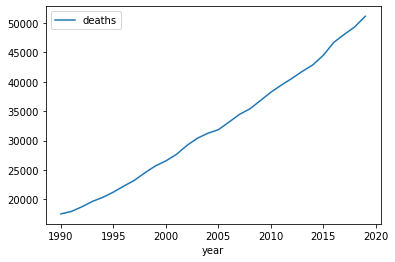

In [ ]:
#Muestra el grafico de la serie de tiempo.
df.plot()

In [ ]:
jarquebera_test(df.deaths)

JB Test Statistic : 1.8143104749264205
p-value : 0.4036709401605231
Existe evidencia débil contra la hipótesis nula, lo que indica que no es estacionaria en promedio


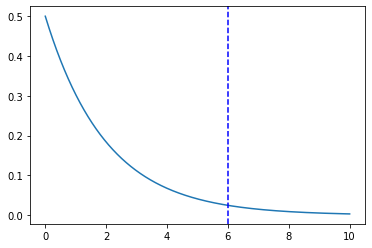

In [ ]:
x = np.arange(0, 10, 0.001)
plt.plot(x, stats.chi2.pdf(x, df=2))
plt.axvline(x = 5.99, color = 'b', linestyle = '--')
plt.show()

Se concluye con el 95% de confianza que los datos se distribuyen como una normal. por otro lado se concluye que la serie no es estacionaria en media.
El Estadístico de contraste de Jarque-Bera JB se distribuye como una Chi_Cuadrado de 2 grados de libertad. la cual para el 95% de confianza es igual a 5.99 como lo muestra la gráfica.

Nota: El contraste o test de Jarque-Bera por ser asintoticamente una Chi_Cuadrado de 2 grados de libertad, no es muy potente, por lo que es siempre recomentdado complementar con otros test y usarlo como primer indicador. 



In [ ]:
df1 = df.iloc[:int(df.shape[0]/2):]
df2 = df.iloc[-int(df.shape[0]/2):]
levene = stats.levene(df1.deaths, df2.deaths)
levene

LeveneResult(statistic=1.3213235426628656, pvalue=0.2600789058830362)

La figura muestra la grafica de una distribución F de Snedecor de 4 grados de libertad en el numerador y 25 en el denominador. gl num= k-1 donde k es el numero de categorias en la distribución de frecuencias. gl denom= n - k - 1.

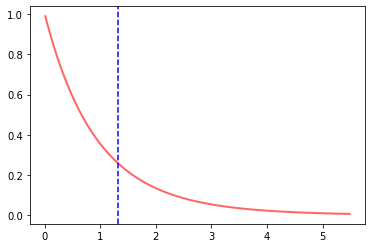

In [ ]:
dfn, dfd = 2, 27
x = np.linspace(stats.f.ppf(0.01, dfn, dfd), stats.f.ppf(0.99, dfn, dfd), 100)
plt.plot(x, stats.f.pdf(x, dfn, dfd), 'r-', lw=2, alpha=0.6, label='f pdf')
plt.axvline(x = levene.statistic, color = 'b', linestyle = '--')
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


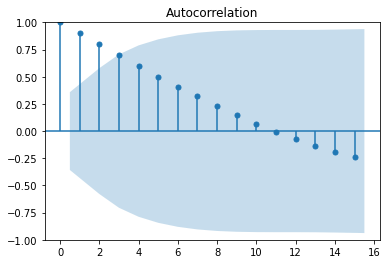

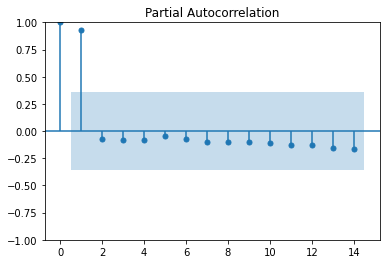

In [ ]:
#Este modulo debería mostrar las graficas de las dos funciones de autocorrelación
#La FAC o función de Autocorrelación en la primera grafica y la FACP o Función
#de Autocorrelación Parcial en la segunda grafica. Genera un error porque no contempla valores negativos.
df = of.copy()
plot_acf(df)
plot_pacf(df, lags=14)
plt.show()

In [ ]:
test_result = adfuller(df['deaths'])

In [ ]:
#Muestra el resultado de la prueba de Dickey-Fuller
adfuller_test(df['deaths'])

ADF Test Statistic : 4.193887020937022
p-value : 1.0
#Lags Used : 2
Number of Observations Used : 27
Existe evidencia débil contra la hipótesis nula, la serie de tiempo tiene una raíz unitaria, lo que indica que no es estacionaria 


In [ ]:
#Calcula la primera diferencia de la serie. Se direrencia solo con respecto de 1 rezago. 
df['deaths_primera_diferencia'] = (df['deaths'] - df['deaths'].shift(1))
df = df.dropna()

<AxesSubplot:xlabel='year'>

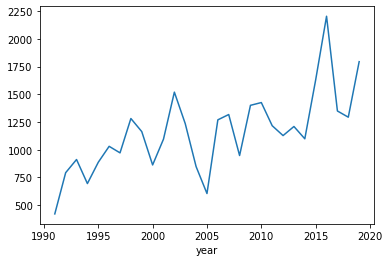

In [ ]:
#Muestra la grafica de la serie diferenciada. 
df['deaths_primera_diferencia'].plot()

In [ ]:
#Muestra el resultado de la prueba de Dickey-Fuller
adfuller_test(df.deaths_primera_diferencia)

ADF Test Statistic : -1.4679431017439106
p-value : 0.5493056581158401
#Lags Used : 2
Number of Observations Used : 26
Existe evidencia débil contra la hipótesis nula, la serie de tiempo tiene una raíz unitaria, lo que indica que no es estacionaria 


In [ ]:
#Calcula la segunda diferewncia dado que la primera muestra todavia una tendencia que no es lo adecuado.
df['deaths_second_difference'] = df['deaths_primera_diferencia'] - df['deaths_primera_diferencia'].shift(1)
df = df.dropna()

In [ ]:
#Muestra la serie en su segunda diferencia.
df['deaths_second_difference'].head()

year
1992    372.0
1993    119.0
1994   -217.0
1995    192.0
1996    144.0
Name: deaths_second_difference, dtype: float64

<AxesSubplot:xlabel='year'>

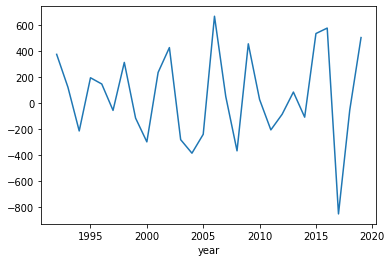

In [ ]:
#Muestra el grafico de la segunda diferencia
df['deaths_second_difference'].plot()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


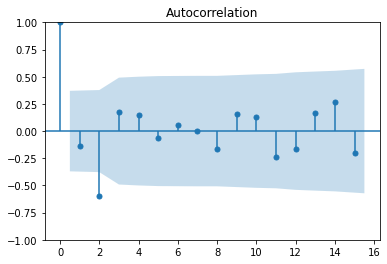

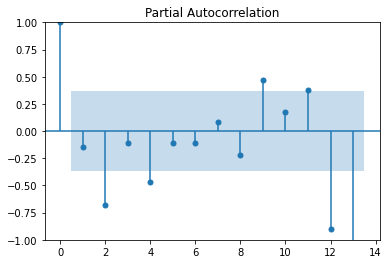

In [ ]:
#Muestra el correlograma en segunda diferencia. 
plot_acf(df['deaths_second_difference'])
plot_pacf(df['deaths_second_difference'], lags=13)
plt.show()

In [ ]:
#Estima el modelo para un ARIMA de orden(1,2,0) y luego hace el ajuste o Fit 
import datetime
de = df.copy()
de.index = pd.DatetimeIndex(pd.to_datetime(de.index, format='%Y'), freq='AS-JAN')
model = ARIMA(de['deaths'], order=(1, 2, 0))
model_fit = model.fit()

In [ ]:
#Muestra el resumen de la estimación del modelo.
#Es en este momento cuando se observan los resultados para saber si el modelo estimado es 
#buen candidato para las estimaciones. 
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 deaths   No. Observations:                   28
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -189.611
Date:                Mon, 06 Mar 2023   AIC                            383.222
Time:                        14:27:51   BIC                            385.738
Sample:                    01-01-1992   HQIC                           383.946
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0130      0.184     -0.071      0.943      -0.373       0.347
sigma2      1.269e+05   4.41e+04      2.879      0.004    4.05e+04    2.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.43   Prob(JB):                         0.92
Heteroskedasticity (H):               3.01   Skew:                            -0.14
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

En este punto se debe hacer las pruebas de los residuos. las cuales son las mismas pruebas de estacionariedad de Jarque-Bera, Bartlett, y correlogramas... 

The dynamic keyword affects in-sample prediction. If dynamic is False, then the in-sample lagged values are used for prediction. If dynamic is True, then in-sample forecasts are used in place of lagged dependent variables. The first forecast value is start.

In [ ]:
#Construye las estimaciones de la serie de tiempo para los años correspondientes. 
#df['forecast']=model_fit.predict(start=3,end=40,dynamic=True)
de['prediction'] = model_fit.predict(start='1992-01-01', end='2019-01-01')
de = de.tail(-2)

In [ ]:
forecast = model_fit.forecast(steps=11).astype(int)
forecast

2020-01-01    52923
2021-01-01    54712
2022-01-01    56500
2023-01-01    58289
2024-01-01    60077
2025-01-01    61866
2026-01-01    63654
2027-01-01    65443
2028-01-01    67231
2029-01-01    69020
2030-01-01    70808
Freq: AS-JAN, Name: predicted_mean, dtype: int64

In [ ]:
rnd_forecast = (forecast + np.random.normal(0.0, 20, len(forecast))).astype(int)

In [ ]:
data = pd.DataFrame(data={
    'prediction': pd.concat([de.prediction, rnd_forecast]).astype(int)
})

data['lim-inf'] = data['prediction'] - 1.96*data['prediction'].rolling(2).std().fillna(0).astype(int)
data['lim-sup'] = data['prediction'] + 1.96*data['prediction'].rolling(2).std().fillna(0).astype(int)

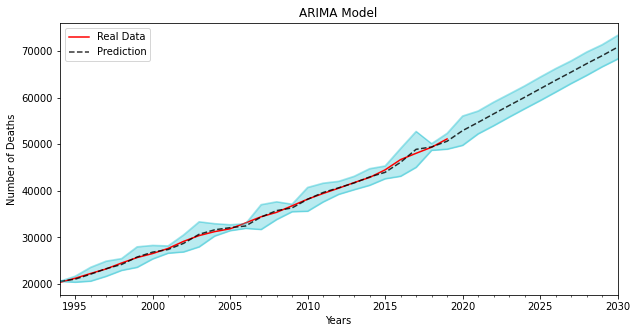

In [ ]:
de.deaths.plot(color='red', figsize=(10,5), label="Real Data")
data.prediction.plot(color='black', linestyle='--', alpha=.8, label="Prediction")
data['lim-inf'].plot(color='tab:cyan', alpha=.4, label='')
data['lim-sup'].plot(color='tab:cyan', alpha=.4, label='')
plt.fill_between(data.index, data['lim-inf'], data['lim-sup'], color='tab:cyan', alpha=.3)
plt.title('ARIMA Model')
plt.xlabel('Years')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

In [ ]:
data

,prediction,lim-inf,lim-sup
1994-01-01,20578,20578.00,20578.00
1995-01-01,21036,20402.92,21669.08
1996-01-01,22110,20622.36,23597.64
1997-01-01,23286,21657.24,24914.76
1998-01-01,24201,22932.88,25469.12
1999-01-01,25788,23588.88,27987.12
2000-01-01,26840,25383.72,28296.28
2001-01-01,27404,26623.92,28184.08
2002-01-01,28726,26895.36,30556.64
2003-01-01,30668,27976.92,33359.08


In [ ]:
rnd_forecast

2020-01-01    52905
2021-01-01    54673
2022-01-01    56499
2023-01-01    58285
2024-01-01    60057
2025-01-01    61879
2026-01-01    63701
2027-01-01    65457
2028-01-01    67268
2029-01-01    68979
2030-01-01    70811
Freq: AS-JAN, Name: predicted_mean, dtype: int64